## Part 1 of an Image Based Clustering method

In [1]:
import os, sys
import datetime
from os import listdir
from os.path import isfile, join
import copy
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

sys.path.append("scripts/")

In [3]:
#see https://dtaidistance.readthedocs.io/en/latest/usage/installation.html#from-pypi and install from source
from dtaidistance import clustering
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [4]:
#pip install tsam
import tsam.timeseriesaggregation as tsam

In [5]:
#from ts_cluster import TSCluster

In [6]:
%matplotlib inline

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
PATH='../input/merged_data/'

### Read in Data

In [12]:
hh = pd.read_csv(PATH+'hh_melted_all.csv')

In [13]:
hh.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,LCL_day_uid,Bank_holiday,time,energy(kWh/hh)
0,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,00:00:00,NaN
1,1,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,00:30:00,0.0
2,2,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,01:00:00,0.0
3,3,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,01:30:00,0.0
4,4,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,02:00:00,0.0


In [19]:
macs = hh['LCLid'].unique() 

In [20]:
#number of households:
len(macs)

5567

In [21]:
informations_households = pd.read_csv(PATH+'informations_households.csv')

In [22]:
informations_households.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [23]:
acorns = informations_households['Acorn'].unique() 
#number of acorns:
len(acorns)

19

### Select houses from a particular Acorn

In [24]:
acorn_a_houses = informations_households.loc[informations_households['Acorn']=='ACORN-A']['LCLid']

In [25]:
acorn_a_hh = hh.loc[hh['LCLid'].isin(acorn_a_houses)]

In [26]:
acorn_a_hh.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,LCL_day_uid,Bank_holiday,time,energy(kWh/hh)
0,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,00:00:00,NaN
1,1,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,00:30:00,0.0
2,2,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,01:00:00,0.0
3,3,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,01:30:00,0.0
4,4,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,02:00:00,0.0


In [27]:
acorn_a_2d = acorn_a_hh[['LCLid','energy(kWh/hh)']]

In [28]:
acorn_a_2d.fillna(0, inplace=True)

In [29]:
acon_energy = [x['energy(kWh/hh)'] for _, x in acorn_a_2d.groupby('LCLid')]

In [30]:
type(acon_energy[1])

pandas.core.series.Series

In [32]:
#clustering code needs numpy arrays
series_data=[]
for a in acon_energy:
    series_data.append(a.values[:34000])

### Hierachical clustering

Tried this method - but doesnt seem that useful  - not going to be able to display 5500 time series in a plot

In [38]:
#even just using a single acorn took >2hrs to run cell below before stopped it, try on a subset
series_subset = series_data[1:6]

In [88]:
#TODO check why series are not all same length

In [39]:
for s in series_subset:
    print (len(s))

34000
34000
34000
34000
34000


In [40]:
# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series_subset)

(None, array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3863ec5ba8>,
       dtype=object))

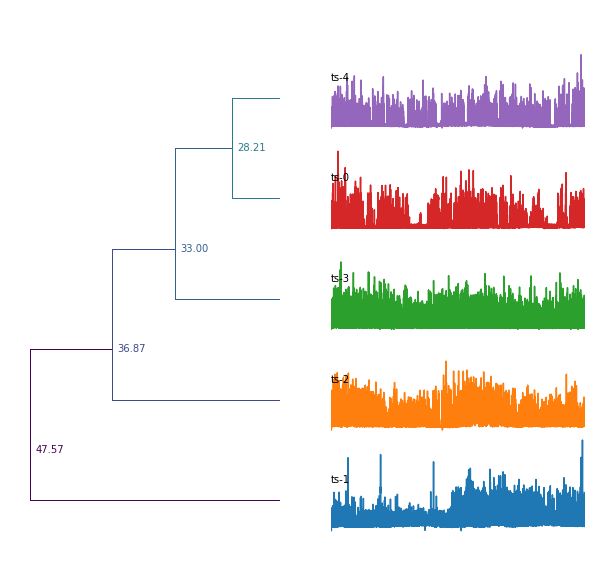

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model3.plot("../plots/hierarchy.png", axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

### Plot dynamic time warping paths between 2 consecutive days (half hourly data) for a sample household

Interesting method for exploring relationships between time series - could also try plotting energy use vs temperature

In [36]:
MAC000002_data = hh.loc[hh['LCLid']=='MAC000002']
MAC000002_data = MAC000002_data.fillna(0, inplace=True)

In [59]:
MAC000002_data.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,LCL_day_uid,Bank_holiday,time,energy(kWh/hh)
0,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,00:00:00,NaN
1,1,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,00:30:00,0.0
2,2,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,01:00:00,0.0
3,3,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,01:30:00,0.0
4,4,MAC000002,2012-10-12,0.1385,0.154304,0.886,46.0,0.196034,7.098,0.0,MAC000002_2012-10-12,NaN,02:00:00,0.0


In [28]:
MAC000002_day_1 = MAC000002_data.loc[MAC000002_data['day']=='2012-10-13']
MAC000002_day_2 = MAC000002_data.loc[MAC000002_data['day']=='2012-10-14']

In [31]:
MAC000002_day_1=MAC000002_day_1['energy(kWh/hh)'].values
MAC000002_day_2=MAC000002_day_2['energy(kWh/hh)'].values

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fd2a2ea4240>])

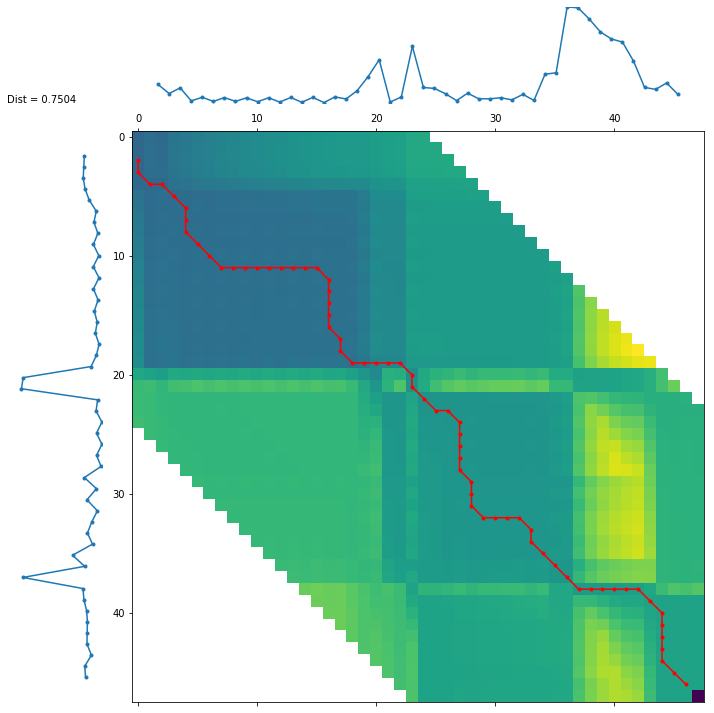

In [32]:
d, paths = dtw.warping_paths(MAC000002_day_1, MAC000002_day_2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(MAC000002_day_1, MAC000002_day_2, paths, best_path)

### tsam

This is a really rich way of displaying time series information.

So much so that I used this method for generting plots for a consistent time range for a number of households, then ran a CNN based image similarity clustering approach to group them.

Would be interesting to explore if we could use these images for CNN based forecasting - predict what the next 7 days would look like then decompose the image into energy use.

In [11]:
def plotTS(data, periodlength, vmin, vmax, name='plot'):
    fig, axes = plt.subplots(figsize = [14, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Half hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label('energy(kWh/hh)')
    plt.savefig('plots/clustering/{0}.png'.format(name))


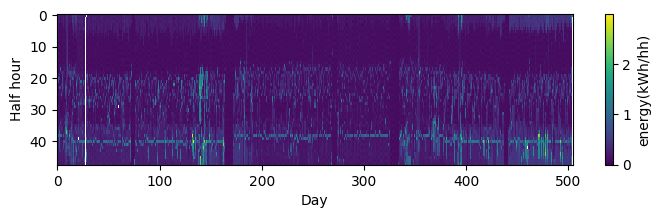

In [69]:
plotTS(MAC000002_data['energy(kWh/hh)'], 48, vmin = MAC000002_data['energy(kWh/hh)'].min(), vmax =MAC000002_data['energy(kWh/hh)'].max())

In [70]:
MAC000048_data = hh.loc[hh['LCLid']=='MAC000048']

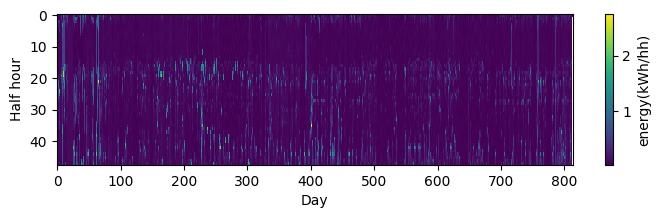

In [71]:
plotTS(MAC000048_data['energy(kWh/hh)'], 48, vmin = MAC000048_data['energy(kWh/hh)'].min(), vmax =MAC000048_data['energy(kWh/hh)'].max())

In [72]:
MAC005492_data = hh.loc[hh['LCLid']=='MAC005492']

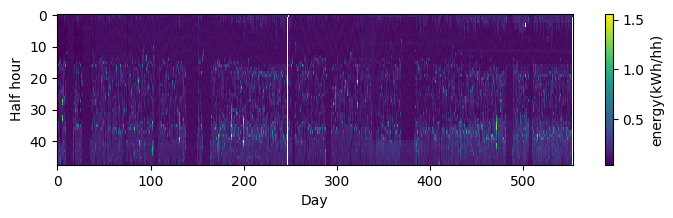

In [73]:
plotTS(MAC005492_data['energy(kWh/hh)'], 48, vmin = MAC005492_data['energy(kWh/hh)'].min(), vmax =MAC005492_data['energy(kWh/hh)'].max())

We can use CNN's for clustering these rich images eg:

https://github.com/facebookresearch/deepcluster

https://arxiv.org/abs/1807.05520
    
Here we are using https://github.com/zegami/image-similarity-clustering due to time limitations precluding installing deepcluster (required different CuDNN version)



In [10]:
#This dataset is only 8.9GB cf 26.1GB for hh_melted_all.csv
hh_df = pd.read_csv(PATH+'halfhourly_all.csv')

In [11]:
hh_df.head()

,Unnamed: 0,LCLid,tstp,energy(kWh/hh)
0,0,MAC000041,2011-12-08 10:30:00.0000000,0.126
1,1,MAC000041,2011-12-08 11:00:00.0000000,0.12
2,2,MAC000041,2011-12-08 11:30:00.0000000,0.119
3,3,MAC000041,2011-12-08 12:00:00.0000000,0.425
4,4,MAC000041,2011-12-08 12:30:00.0000000,0.154


Lets select only data within the period of most household data

In [14]:
hh_df['tstp'] = pd.to_datetime(hh_df['tstp'], format = '%Y-%m-%d %H:%M:%S')

In [15]:
hh_df.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
start_date=datetime.datetime(year=2013,month=1,day=1)
end_date=datetime.datetime(year=2014,month=1,day=1)

In [19]:
# Data subset
hh_df_subset=hh_df[(hh_df["tstp"]>=start_date) & (hh_df["tstp"]<end_date)]

In [20]:
mac_counts = hh_df_subset.groupby(['LCLid']).size()

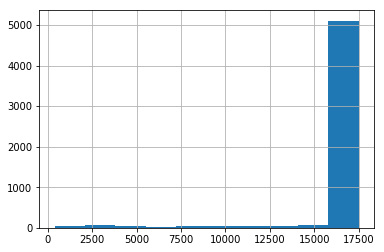

In [22]:
#histogram of half hourly pooint counts
mac_counts.hist()

In [49]:
#For some reason the energy column read in as a string, here we convert to float

In [45]:
hh_df_subset.dtypes

LCLid                     object
tstp              datetime64[ns]
energy(kWh/hh)            object
dtype: object

In [48]:
hh_df_subset['energy(kWh/hh)'] = hh_df_subset['energy(kWh/hh)'].replace('Null', 0.0)
hh_df_subset['energy(kWh/hh)'] = hh_df_subset['energy(kWh/hh)'].astype('float64') 

In [50]:
# Turn interactive plotting off
plt.ioff()

In [51]:
#get a dict of key (mac) and value (row count)
d = hh_df_subset['LCLid'].value_counts().to_dict()

In [62]:
#(arbitrary) minimum number of sample points we want within our one year data window
#lets start with a full 365 days of data and just cluster these
min_pts = 365*48

In [63]:
%%capture
#the only way I could work out how to force mpl not to show the plot inline
def save_plotTS(data, periodlength, vmin, vmax, name='plot'):
    fig, axes = plt.subplots(figsize = [14, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Half hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label('energy(kWh/hh)')
    plt.savefig('plots/clustering/{0}.png'.format(name))
    plt.close()

In [67]:
i=0
for k, v in d.items():
    #want only households with >n days of data within this window
    if v >= min_pts:
        mac_data = hh_df_subset.loc[hh_df_subset['LCLid']==k]
        save_plotTS(mac_data['energy(kWh/hh)'], 48, vmin = mac_data['energy(kWh/hh)'].min(), vmax =mac_data['energy(kWh/hh)'].max(), name=k)
        i+=1
print('{0} households plotted'.format(i))
        

1132 households plotted


In [ ]:
#see notebook 3_0_a_clustering_tsne for clutering plots and example clusters

### Forecast data review

Lets plot the data we have run ML/CNN/LSTM forecasts on - mac000230 and mac000100

In [10]:
mac000230 = pd.read_csv(PATH+'LCLid/clean/mac000230.csv')

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


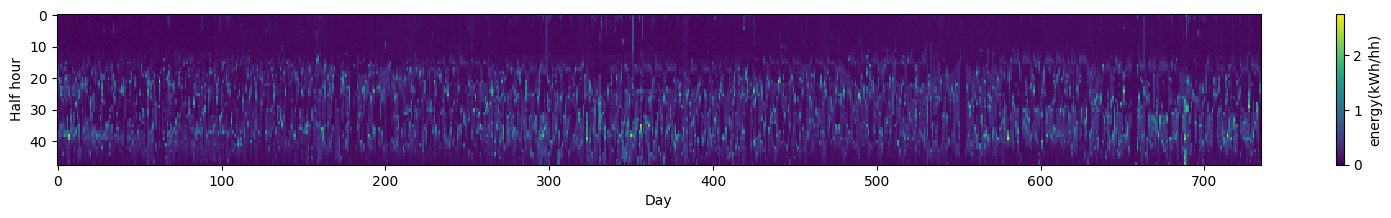

In [12]:
plotTS(mac000230['energy(kWh/hh)'], 48, vmin = mac000230['energy(kWh/hh)'].min(), vmax = mac000230['energy(kWh/hh)'].max())

In [13]:
mac000100 = pd.read_csv(PATH+'LCLid/clean/mac000100.csv')

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


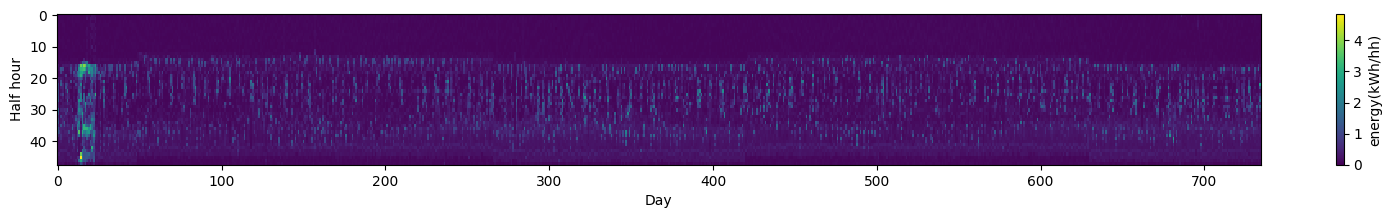

In [14]:
plotTS(mac000100['energy(kWh/hh)'], 48, vmin = mac000100['energy(kWh/hh)'].min(), vmax = mac000100['energy(kWh/hh)'].max(), name='mac000100_example.png')